<a href="https://colab.research.google.com/github/GitHubAjoy/CurveFitting/blob/master/AjoyCustomData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd "/content/drive/My Drive/darknet-master/"

/content/drive/My Drive/darknet-master


In [ ]:
%ls


3rdparty/       darknet                 include/               results/
backup/         DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts/
build/          darknet_images.py       LICENSE                src/
build.ps1       darknet.py              Makefile               video_yolov3.sh
build.sh        darknet_video.py        net_cam_v3.sh          video_yolov4.sh
cfg/            data/                   net_cam_v4.sh          yolov4.conv.137
cmake/          image_yolov3.sh         obj/
CMakeLists.txt  image_yolov4.sh         README.md


In [5]:
!make
!chmod +x ./darknet


chmod +x *.sh


In [6]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (517 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144600 files and directories curren

In [7]:
!dos2unix ./data/train.txt
!dos2unix ./data/obj.data
!dos2unix ./data/obj.names
!dos2unix ./cfg/yolov-obj.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/obj.data to Unix format...
dos2unix: converting file ./data/obj.names to Unix format...
dos2unix: converting file ./cfg/yolov-obj.cfg to Unix format...


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
! ./darknet detector train data/obj.data cfg/yolov-obj.cfg yolov4.conv.137 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov-obj
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 2, batch = 32, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 

In [ ]:
%cd "/content/drive/My Drive/darknet-master/"
%ls


/content/drive/My Drive/darknet-master
3rdparty/            DarknetConfig.cmake.in  net_cam_v3.sh*
backup/              darknet_images.py       net_cam_v4.sh*
build/               darknet.py              obj/
build.ps1            darknet_video.py        README.md
build.sh*            data/                   results/
cfg/                 image_yolov3.sh*        scripts/
chart.png            image_yolov4.sh*        src/
chart_yolov-obj.png  include/                video_yolov3.sh*
cmake/               json_mjpeg_streams.sh*  video_yolov4.sh*
CMakeLists.txt       LICENSE                 yolov4.conv.137
darknet*             Makefile


In [ ]:
%cd backup/
%ls
%cd -

[Errno 2] No such file or directory: 'backup/'
/content/drive/My Drive/darknet-master/backup
yolov-obj_last.weights
/content/drive/My Drive/darknet-master


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!./darknet detector test data/obj.data cfg/yolov-obj.cfg backup/yolov-obj_last.weights data/Air3.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 ro

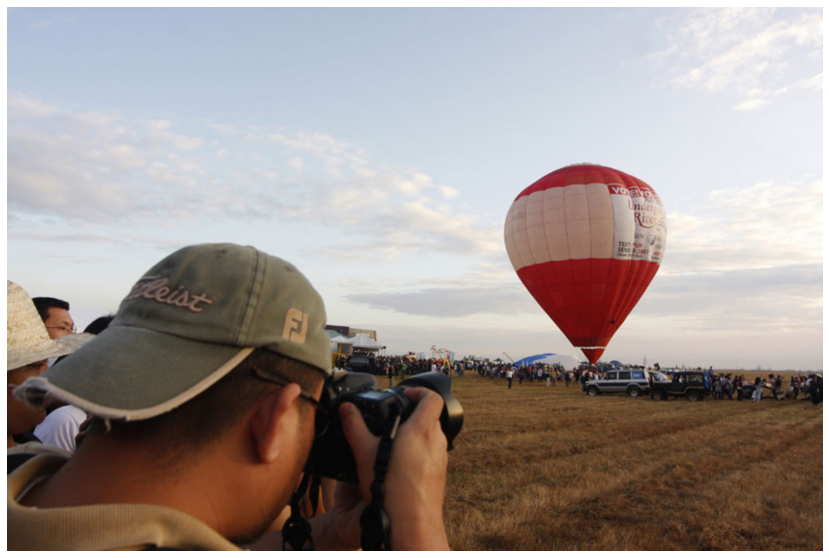

In [ ]:
imShow('predictions.jpg')